In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression as LR

In [26]:
data=pd.read_csv(r"C:\Users\hp\Desktop\python\机器学习菜菜\sklearnjqxx_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\05逻辑回归与评分卡\rankingcard.csv",index_col=0)


In [27]:
#探索数据及预处理
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [28]:
#观察数据结构
data.shape

(150000, 11)

In [29]:
data.info()
#10个特征，SeriousDlqin2yrs 是标签

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [30]:
#去除重复值
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [31]:
#删除后记得恢复索引（因为删除后的索引不变）
data.index=range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [33]:
#填补缺失值
data.info()
#查看缺失的比例
data.isnull().sum()/data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [34]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)
data.info()
data.isnull().sum()/data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [35]:
#随机森林填补“收入”缺失值
def fill_missing_rf(X,y,to_fill):

    """
    使用随机森林填补一个特征的缺失值的函数

    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """

    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

    # 找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]

    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)

    return Ypredict

In [37]:
#接下来我们需要创造函数需要的参数，将参数导入函数，产出结果
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]#y = data.iloc[:,0]
X.shape#(149391, 10)

(149391, 10)

In [38]:
#=====[TIME WARNING:1 min]=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")
y_pred.shape

(29221,)

In [39]:
#注意可以通过以下代码检验数据是否数量相同
#y_pred.shape ==  data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"].shape
#data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"].shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [40]:
#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [41]:
y_pred.shape

(29221,)

In [42]:
#描述性统计处理异常值
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5425.088333,13229.525166,0.0,0.0,0.180000,1800.000000,4420.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [43]:
#通过这个表格发现，age最小值为0，这不符合银行业务要求，所有我们要看看有多少age=0
#然后看到NumberOfTimes90DaysLate在90%以前都为0所以是一个严重偏态的数据
(data["age"]==0).sum()
#发现只有1个年龄为0，应该是输入失误造成的，所以我们可以删掉

1

In [44]:
data=data[data["age"]!=0]

In [45]:
data.shape

(149390, 11)

In [46]:
#把违约NumberOfTimes90DaysLate 90次以上的找到
data[data.loc[:,"NumberOfTimes90DaysLate"]>90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [47]:
data[data.loc[:,"NumberOfTimes90DaysLate"]>90]
#有225个样本存在这样的情况，并且这些样本，在信誉上并不都是坏客户，因此，我们基本可以判断，这些样本是存在某种异常，应该把它们删除

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1284.243150,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2469.530000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2070.184667,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,8.270000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,674.190000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


In [48]:
data=data[data.loc[:,"NumberOfTimes90DaysLate"]<90]
data.index=range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [49]:
#样本不平衡问题
#探索标签的分布
X=data.iloc[:,1:]
y=data.iloc[:,0]
y

0         1
1         0
2         0
3         0
4         0
         ..
149160    0
149161    0
149162    0
149163    0
149164    0
Name: SeriousDlqin2yrs, Length: 149165, dtype: int64

In [50]:
y.value_counts()#因为0有139292，1有9873这说明这是严重不均衡的

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [51]:
n_sample=X.shape[0]
n_l_sample=y.value_counts()[1]
n_0_sample=y.value_counts()[0]
print('样本个数：{};1占{:.2%};0占{:.2%}'.format(n_sample,n_l_sample/n_sample,n_0_sample/n_sample))

样本个数：149165;1占6.62%;0占93.38%


In [52]:
#我们发现样本是不平衡的
#在逻辑回归中使用最多的是上采样方法来平衡样本
#imblearn是专门用来处理不平衡数据集的库，在处理样本不平衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化,fit拟合，和sklearn用法类似
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)#实例化
X,y=sm.fit_resample(X,y)
n_sample_=X.shape[0]

In [53]:
X.shape

(278584, 10)

In [54]:
y

0         1
1         0
2         0
3         0
4         0
         ..
278579    1
278580    1
278581    1
278582    1
278583    1
Name: SeriousDlqin2yrs, Length: 278584, dtype: int64

In [55]:
pd.Series(y).value_counts()

0    139292
1    139292
Name: SeriousDlqin2yrs, dtype: int64

In [56]:
n_l_sample=pd.Series(y).value_counts()[1]
n_0_sample=pd.Series(y).value_counts()[0]
print('样本个数：{};1占{:.2%};0占{:.2%}'.format(n_sample_,n_l_sample/n_sample_,n_0_sample/n_sample_))
#此时已经平衡了样本

样本个数：278584;1占50.00%;0占50.00%


In [57]:
#分训练集和测试集
from sklearn.model_selection import train_test_split
X=pd.DataFrame(X)
y=pd.DataFrame(y)
X_train,X_vali,Y_train,Y_vali=train_test_split(X,y,test_size=0.3,random_state=420)

In [58]:
model_data=pd.concat([Y_train,X_train],axis=1)
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
81602,0,0.015404,53,0,0.121802,4728.000000,5,0,0,0,0.000000
149043,0,0.168311,63,0,0.141964,1119.000000,5,0,0,0,0.000000
215073,1,1.063570,39,1,0.417663,3500.000000,5,1,0,2,3.716057
66278,0,0.088684,73,0,0.522822,5301.000000,11,0,2,0,0.000000
157084,1,0.622999,53,0,0.423650,13000.000000,9,0,2,0,0.181999
...,...,...,...,...,...,...,...,...,...,...,...
178094,1,0.916269,32,2,0.548132,6000.000000,10,0,1,0,3.966830
62239,1,0.484728,50,1,0.370603,5258.000000,12,0,1,0,2.000000
152127,1,0.850447,46,0,0.562610,8000.000000,9,0,1,0,2.768793
119174,0,1.000000,64,0,0.364694,10309.000000,7,0,3,0,0.000000


In [59]:
model_data.index=range(model_data.shape[0])
model_data.columns=data.columns
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.015404,53,0,0.121802,4728.000000,5,0,0,0,0.000000
1,0,0.168311,63,0,0.141964,1119.000000,5,0,0,0,0.000000
2,1,1.063570,39,1,0.417663,3500.000000,5,1,0,2,3.716057
3,0,0.088684,73,0,0.522822,5301.000000,11,0,2,0,0.000000
4,1,0.622999,53,0,0.423650,13000.000000,9,0,2,0,0.181999
...,...,...,...,...,...,...,...,...,...,...,...
195003,1,0.916269,32,2,0.548132,6000.000000,10,0,1,0,3.966830
195004,1,0.484728,50,1,0.370603,5258.000000,12,0,1,0,2.000000
195005,1,0.850447,46,0,0.562610,8000.000000,9,0,1,0,2.768793
195006,0,1.000000,64,0,0.364694,10309.000000,7,0,3,0,0.000000


In [60]:
vali_data=pd.concat([Y_vali,X_vali],axis=1)
vali_data.index=range(vali_data.shape[0])
vali_data.columns=data.columns
model_data.to_csv(r"C:\Users\hp\Desktop\python\机器学习菜菜\sklearnjqxx_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\05逻辑回归与评分卡\model_data.csv")
vali_data.to_csv(r"C:\Users\hp\Desktop\python\机器学习菜菜\sklearnjqxx_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\05逻辑回归与评分卡\vali_data.csv")
#反复的copy数据比较麻烦，直接保存成csv文件

In [61]:
#分箱：本质是对特征分档

In [62]:
#首先以“age”为例子
#按照等频对需要分箱的列进行分箱
model_data["qcut"],updown=pd.qcut(model_data["age"],retbins=True,q=20)
"""
pd.qcut,基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据，返回箱子的上限和下限
参数q:要分箱的个数
参数retbins=True来要求同时返回结构为索引的样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""

'\npd.qcut,基于分位数的分箱函数，本质是将连续型变量离散化\n只能够处理一维数据，返回箱子的上限和下限\n参数q:要分箱的个数\n参数retbins=True来要求同时返回结构为索引的样本索引，元素为分到的箱子的Series\n现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限\n'

In [63]:
#在这里让model_data新添加一列叫“分箱model_data["qcut"]这一列其实就是每个样本所对应的箱子
model_data["qcut"]

0         (52.0, 54.0]
1         (61.0, 64.0]
2         (36.0, 39.0]
3         (68.0, 74.0]
4         (52.0, 54.0]
              ...     
195003    (31.0, 34.0]
195004    (48.0, 50.0]
195005    (45.0, 46.0]
195006    (61.0, 64.0]
195007    (52.0, 54.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 107.0]]

In [64]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [65]:
#所有箱子的上限和下限
updown#20个箱子的上限和下限

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [66]:
#统计每个分箱中0和1的数量
#这里使用了数据透视表的功能groupby
coount_y0=model_data[model_data["SeriousDlqin2yrs"]==0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
#按照qcut进行聚合求总数

In [67]:
coount_y1=model_data[model_data["SeriousDlqin2yrs"]==1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [68]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins=[*zip(updown,updown[1:],coount_y0,coount_y1)]
#注意：zip会按照最短列来进行结合
##[*zip([1,2,3],["a","b","c","d"])]返回[(1, 'a'), (2, 'b'), (3, 'c')]

In [69]:
#[*zip([1,2,3],["a","b","c"])]返回[(1, 'a'), (2, 'b'), (3, 'c')]

In [70]:
num_bins
#有了这个num_bins再进行计算IV的值就很容易了
#IV=西格玛1-N(good%-bad%)*WOEi   (WOEi=ln(good%/bad% ))

[(21.0, 28.0, 4243, 7500),
 (28.0, 31.0, 3571, 5903),
 (31.0, 34.0, 4075, 6798),
 (34.0, 36.0, 2908, 4592),
 (36.0, 39.0, 5182, 7511),
 (39.0, 41.0, 3956, 5847),
 (41.0, 43.0, 4002, 5704),
 (43.0, 45.0, 4389, 5949),
 (45.0, 46.0, 2419, 3259),
 (46.0, 48.0, 4813, 6189),
 (48.0, 50.0, 4900, 6223),
 (50.0, 52.0, 4728, 5813),
 (52.0, 54.0, 4681, 5006),
 (54.0, 56.0, 4677, 4015),
 (56.0, 58.0, 4483, 3411),
 (58.0, 61.0, 6583, 4799),
 (61.0, 64.0, 6968, 3196),
 (64.0, 68.0, 6623, 2293),
 (68.0, 74.0, 6753, 1933),
 (74.0, 107.0, 7737, 1376)]

In [71]:
#检验确保每个箱中都有0和1（本例中不需要，这段代码作用是检验0和1）
for i in range(20):
    #如果第一组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2]=[(num_bins[0][0],num_bins[1][1],num_bins[0][2]+num_bins[1][2],num_bins[0][3]+num_bins[1][3])]
        continue
    """
    合并后，第一行的组是否一定就有两种样本了呢？不一定
    如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并后
    第一行的组也没有包含两种样本
    
    所以我们在每次合并完毕之后，还需要检查一下，第一组是否已经包含了两种样本
    这里使用continue跳出本次循环，开始下一个循环，所以回到了最开始的for i in range(20)
    让i+1
    
    这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
    如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次
    最多合并20次
    如果第一组已经包含两种样本，则if不通过，就开始执行下面的代码
    """
    #已经确认第一组中肯定 包含两种样本了，如果其他组没有包含两种样本，就向前合并
    #此时的num_bind已经被上面的代码处理过，可能被合并过，也可能没有被合并
    #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1]=[(num_bins[i-1][0],num_bins[i][1]
                           ,num_bins[i-1][2]+num_bins[i][2]
                           ,num_bins[i-1][3]+num_bins[i][3])]
            break
            #如果对第一组和对后面所以组的判断中都没有进入if合并，则提前结束所以的循环
    
    else:
        break
    """
    这个break，只有在if被满足的条件下才会触发
    也就是说，只有在发生了合并，才会打断for i in range(len(num_bins))这个循环
    为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
    但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
    
    举个例子：
    本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in range(5)
    range中输入的变量会转换成数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]
    中遍历
    
    进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4,循环就会报错
    因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
    循环就会回到最开始的for i in range(20)中
    此时判断第一组是否有两种标签的代码就不会被触发，但for i in range(len(num_bins))却被重新运行
    这样就更新了i的取值，循环就不会报错了
    """

In [72]:
#定义WOE和IV函数
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例（bad/total）
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
def get_woe(num_bins):
    #通过num_bins数据计算woe
    columns=['min','max','count_0','count_1']
    df=pd.DataFrame(num_bins,columns=columns)
    df['total']=df.count_0+df.count_1#一个箱中所有的样本数
    df['percentage']=df.total/df.total.sum()#一个箱中样本数占所有样本数的比例
    df['bad_rate']=df.count_1/df.total
    df['good%']=df.count_0/df.count_0.sum()
    df['bad%']=df.count_1/df.count_1.sum()
    df['woe']=np.log(df['good%']/df['bad%'])
    return df
#计算IV值
def get_iv(df):
    rate=df['good%']-df['bad%']
    iv=np.sum(rate*df.woe)
    return iv



In [73]:
#卡方检验
num_bins_=num_bins.copy()
import matplotlib.pyplot as plt
import scipy

In [74]:
num_bins_

[(21.0, 28.0, 4243, 7500),
 (28.0, 31.0, 3571, 5903),
 (31.0, 34.0, 4075, 6798),
 (34.0, 36.0, 2908, 4592),
 (36.0, 39.0, 5182, 7511),
 (39.0, 41.0, 3956, 5847),
 (41.0, 43.0, 4002, 5704),
 (43.0, 45.0, 4389, 5949),
 (45.0, 46.0, 2419, 3259),
 (46.0, 48.0, 4813, 6189),
 (48.0, 50.0, 4900, 6223),
 (50.0, 52.0, 4728, 5813),
 (52.0, 54.0, 4681, 5006),
 (54.0, 56.0, 4677, 4015),
 (56.0, 58.0, 4483, 3411),
 (58.0, 61.0, 6583, 4799),
 (61.0, 64.0, 6968, 3196),
 (64.0, 68.0, 6623, 2293),
 (68.0, 74.0, 6753, 1933),
 (74.0, 107.0, 7737, 1376)]

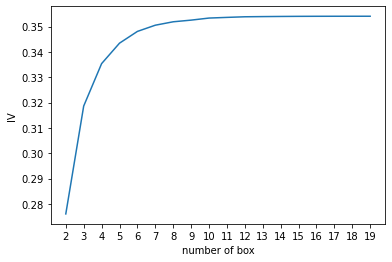

In [75]:
IV=[]
axisx=[]
while len(num_bins_)>2:
    #2代表最后合并的分箱为2组
    pvs=[]
    #获取num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1=num_bins_[i][2:]
        x2=num_bins_[i+1][2:]
        #0返回chi2值，1返回p值
        pv=scipy.stats.chi2_contingency([x1,x2])[1]
        #chi2=scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
    #通过p值进行处理。合并p值最大的两组
    i=pvs.index(max(pvs))
    num_bins_[i:i+2]=[(num_bins_[i][0]
                      ,num_bins_[i+1][1]
                      ,num_bins_[i][2]+num_bins_[i+1][2]
                      ,num_bins_[i][3]+num_bins_[i+1][3])]
    bins_df=get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()
#选下坠最快的那个转折点：这张图当中是5-6的位置

In [76]:
#用最佳分箱个数分箱，并验证分箱结果
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_
 
afterbins = get_bin(num_bins,6)
 
afterbins

[(21.0, 36.0, 14797, 24793),
 (36.0, 54.0, 39070, 51501),
 (54.0, 61.0, 15743, 12225),
 (61.0, 64.0, 6968, 3196),
 (64.0, 74.0, 13376, 4226),
 (74.0, 107.0, 7737, 1376)]

In [78]:
bins_df=get_woe(afterbins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24793,39590,0.203017,0.626244,0.151467,0.254765,-0.519973
1,36.0,54.0,39070,51501,90571,0.464448,0.568626,0.399934,0.529209,-0.280082
2,54.0,61.0,15743,12225,27968,0.143420,0.437107,0.161151,0.125620,0.249077
3,61.0,64.0,6968,3196,10164,0.052121,0.314443,0.071327,0.032841,0.775592
4,64.0,74.0,13376,4226,17602,0.090263,0.240086,0.136922,0.043425,1.148370
5,74.0,107.0,7737,1376,9113,0.046731,0.150993,0.079199,0.014139,1.722998


In [79]:
#现在就完成了age的分箱，得到了每个分箱的woe
#接下来将最佳分箱个数的过程包装成函数，一次性对所有的特征画IV曲线，然后将所有特征都分箱
def graphforbestbin(DF,X,Y,n=5,q=20,graph=True):
    """
    自动优化分箱函数，基于卡方分箱
    参数：
    DF：需要输入的数据
    X：需要分箱的列名
    Y：分箱数据对应的标签Y列名
    n：保留分箱个数
    q:初始分箱的个数
    graph：是否画出IV图像
    区间为左开右闭(]
    """
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

        bins_df_ = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df_))
        finalbinsdf=get_woe(num_bins)
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return finalbinsdf

In [80]:
model_data.columns#第一列和最后一列不需要（SeriousDlqin2yrs是标签，qcut是刚才age时候做的分箱加的一列）

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


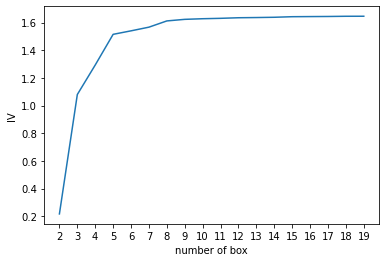

age


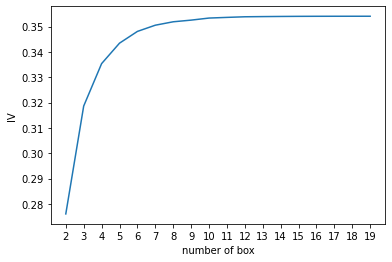

NumberOfTime30-59DaysPastDueNotWorse


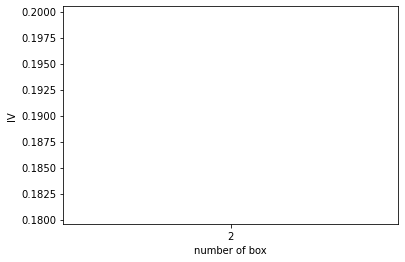

DebtRatio


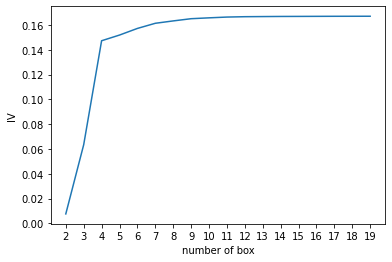

MonthlyIncome


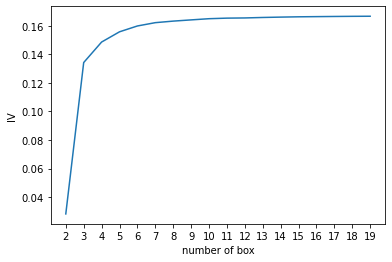

NumberOfOpenCreditLinesAndLoans


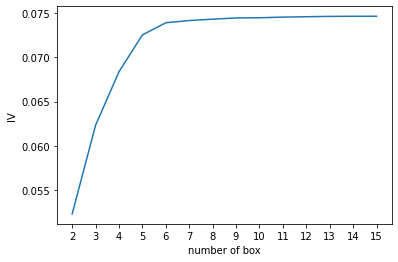

NumberOfTimes90DaysLate


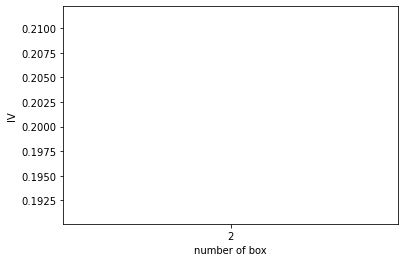

NumberRealEstateLoansOrLines


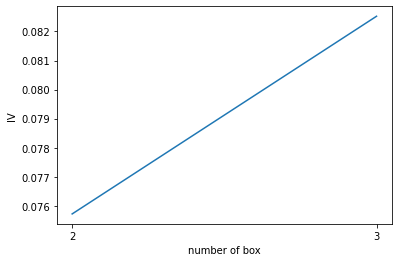

NumberOfTime60-89DaysPastDueNotWorse


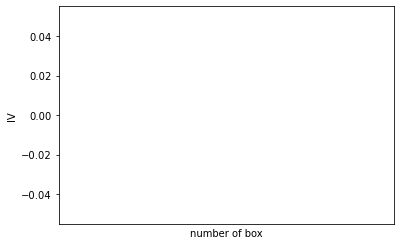

UnboundLocalError: local variable 'finalbinsdf' referenced before assignment

In [81]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20,graph=True)
    

In [82]:
#我们发现，不是所有的特征都可以使用这个分箱函数，比如像家人数量，就无法分出20组。于是我们将可以分箱的特征单独放出来分组，不能自动分箱的变量，自己观察然后手写
auto_col_bins={
    'RevolvingUtilizationOfUnsecuredLines':6
    ,'age':5
    ,'DebtRatio':4
    , 'MonthlyIncome':3
    ,'NumberOfOpenCreditLinesAndLoans':5
}
#不能使用自动分箱的变量
hand_bins={
    'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13]
    ,'NumberOfTimes90DaysLate':[0,1,2,17]
    , 'NumberRealEstateLoansOrLines':[0,1,2,4,54]
    , 'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8]
    ,'NumberOfDependents':[0,1,2,3]
}
#保证区间覆盖使用np.inf替换最大值，用-np.inf替换最小值(因为上面hand_bins里面的数据是我们自己写进去的)
#为了保证假如还有新的值进来后不在最大最小值上报错
hand_bins={k:[-np.inf,*v[:-1],np.inf]for k,v in hand_bins.items()}


In [84]:
#接下来对所有特征按照选择的箱体个数和手写的分箱范围进行分箱：
bins_of_col={}
#生成自动分箱的分箱区间和分箱后的IV值
for col in auto_col_bins:
    bins_df=graphforbestbin(model_data,col,"SeriousDlqin2yrs"
                           ,n=auto_col_bins[col]#使用字典取出每个特征所对应的箱的数量
                           ,q=20
                           ,graph=False)
    bins_list=sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用np.inf替换最大值-np.inf替换最小值
    bins_list[0],bins_list[-1]=-np.inf,np.inf
    bins_of_col[col]=bins_list
    #合并手动分箱数据
    bins_of_col.update(hand_bins)
    

In [85]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09903357452605599,
  0.29822717825679373,
  0.4653341277536195,
  0.9827854656012547,
  0.9999999,
  inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.0173975144, 0.4015959156552209, 1.473664559998111, inf],
 'MonthlyIncome': [-inf, 0.1, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf]}

In [ ]:
#现在把所有特征已经完成分箱
#现在可以算各箱的woe（刚才在graphforbestbin中已经计算出可以自动分箱的woe的值，但是手动分箱的woe的值还没算出来）


In [86]:
#计算各箱的woe并映射到数据中,还是先以age为例
data = model_data.copy()
 
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()

In [88]:
data

,age,SeriousDlqin2yrs
0,53,0
1,63,0
2,39,1
3,73,0
4,53,1
...,...,...
195003,32,1
195004,50,1
195005,46,1
195006,64,0


In [89]:
data["cut"] = pd.cut(data["age"],[-np.inf, 36.0, 54.0, 61.0, 74.0, np.inf])
#将年龄根据上面分箱好数据的进行分箱
data.head()

,age,SeriousDlqin2yrs,cut
0,53,0,"(36.0, 54.0]"
1,63,0,"(61.0, 74.0]"
2,39,1,"(36.0, 54.0]"
3,73,0,"(61.0, 74.0]"
4,53,1,"(36.0, 54.0]"


In [91]:
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()
 
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
 
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
 
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24793,-0.519973
"(36.0, 54.0]",39070,51501,-0.280082
"(54.0, 61.0]",15743,12225,0.249077
"(61.0, 74.0]",20344,7422,1.004502
"(74.0, inf]",7737,1376,1.722998


In [92]:
#把上述过程包装成函数，这样适用于所有的特征求woe
def get_woe(df,col,y,bins):
    """
    df是数据表
    col是每一列的名称
    y是标签
    bins是要分的箱子的名称
    """
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [93]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09903357452605599,
  0.29822717825679373,
  0.4653341277536195,
  0.9827854656012547,
  0.9999999,
  inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.0173975144, 0.4015959156552209, 1.473664559998111, inf],
 'MonthlyIncome': [-inf, 0.1, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf]}

In [94]:
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.200978
 (0.099, 0.298]    0.672181
 (0.298, 0.465]   -0.129636
 (0.465, 0.983]   -1.073125
 (0.983, 1.0]     -0.476182
 (1.0, inf]       -2.039860
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.354437
 (0.0, 1.0]    -0.875222
 (1.0, 2.0]    -1.379126
 (2.0, inf]    -1.547642
 dtype: float64,
 'NumberOfTimes90DaysLate': cut
 (-inf, 0.0]    0.235578
 (0.0, 1.0]    -1.756254
 (1.0, 2.0]    -2.261289
 (2.0, inf]    -2.401731
 dtype: float64,
 'NumberRealEstateLoansOrLines': cut
 (-inf, 0.0]   -0.391791
 (0.0, 1.0]     0.191631
 (1.0, 2.0]     0.617861
 (2.0, 4.0]     0.387124
 (4.0, inf]    -0.296573
 dtype: float64,
 'NumberOfTime60-89DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.124716
 (0.0, 1.0]    -1.386015
 (1.0, 2.0]    -1.768208
 (2.0, inf]    -1.830267
 dtype: float64,
 'NumberOfDependents': cut
 (-inf, 0.0]    0.625134
 (0.0, 1.0]    -0.579547
 (1.0, 2.0]    -0.525898
 (2.0, inf]    -

In [95]:
#接下来把所有的woe映射到原数据中

#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
#model_woe就是原索引
model_woe = pd.DataFrame(index=model_data.index)
 
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
model_woe["age"].head()
#得到的是age所对应的每一个箱的woe值

D:\anaconda\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0   -0.280082
1    1.004502
2   -0.280082
3    1.004502
4   -0.280082
Name: age, dtype: category
Categories (5, float64): [-0.519973 < -0.280082 < 0.249077 < 1.004502 < 1.722998]

In [96]:
 
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
 
#这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
0,-0.280082,2.200978,0.354437,0.235578,-0.391791,0.124716,0.625134,0.036168,-0.233807,-0.052076,0
1,1.004502,0.672181,0.354437,0.235578,-0.391791,0.124716,0.625134,0.036168,-0.233807,-0.052076,0
2,-0.280082,-2.039860,-0.875222,-1.756254,-0.391791,-1.768208,-0.480566,-0.387539,-0.233807,-0.052076,1
3,1.004502,2.200978,0.354437,0.235578,0.617861,0.124716,0.625134,-0.387539,-0.233807,0.124889,0
4,-0.280082,-1.073125,0.354437,0.235578,0.617861,0.124716,-0.579547,-0.387539,0.231083,0.124889,1


In [97]:
#现在弄完了训练集。接下来处理测试集，在已经有分箱的情况下，只需要将已经计算好的woe映射到测试集上就可以了
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]

In [98]:
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
0,2.200978,0.354437,0.235578,-0.391791,0.124716,0.625134,0.249077,1.508473,-0.233807,-0.052076,0
1,-1.073125,0.354437,0.235578,0.617861,0.124716,-0.480566,-0.280082,0.036168,0.231083,0.124889,1
2,2.200978,0.354437,0.235578,-0.391791,0.124716,0.625134,1.004502,0.036168,0.231083,-0.052076,0
3,2.200978,0.354437,0.235578,0.191631,0.124716,0.625134,-0.280082,0.036168,-0.233807,0.124889,0
4,-1.073125,0.354437,0.235578,-0.391791,0.124716,-0.579547,-0.280082,0.036168,-0.233807,0.124889,1


In [99]:
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [ ]:
#接下来就可以顺利建模了

In [100]:
X=model_woe.iloc[:,:-1]
y=model_woe.iloc[:,-1]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [101]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR().fit(X,y)
lr.score(vali_X,vali_y)

0.7708433042978846

In [ ]:
#我们发现得分一般

In [102]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)

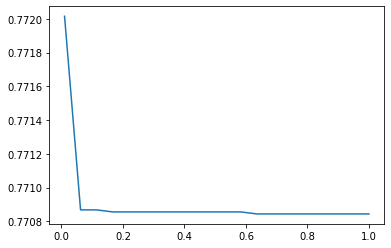

In [103]:
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
#效果依然很差

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


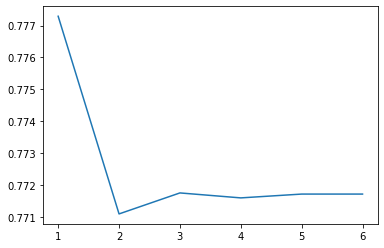

In [81]:
 
lr.n_iter_#array([7], dtype=int32)
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()
#还是一般

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

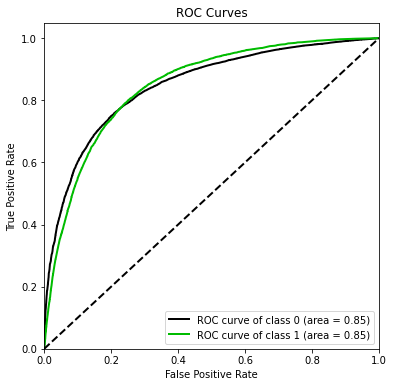

In [104]:
import scikitplot as skplt
vali_proba_df=pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y,vali_proba_df,plot_micro=False
                      ,figsize=(6,6),plot_macro=False)
#该图像所在斜线上方曲线与斜线所围成面积越大，效果越好，在捕捉少数类（标签违约）上表现的效果，这个图像是0.85

In [105]:
#最后一步，做评分卡
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A

(28.85390081777927, 481.8621880878296)

In [106]:
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])
 
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数

cut
(-inf, 36.0]   -11.260074
(36.0, 54.0]    -6.065213
(54.0, 61.0]     5.393795
(61.0, 74.0]    21.752613
(74.0, inf]     37.311732
dtype: float64

In [111]:
file = r"C:\Users\hp\Desktop\python\机器学习菜菜\sklearnjqxx_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\05逻辑回归与评分卡./ScoreData.csv"
 
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")